In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import palettable

from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coords

# Self-training to get the "baseline" spectra

Train on LAMOST spectra using its own Teff, logg, [Fe/H] labels.

In [2]:
plt.rc('figure', dpi=100)

In [3]:
import destroyer
from destroyer import RockDerivative, GradientSpectra, Spectra

In [4]:
gs = GradientSpectra()
d = Spectra()
lamost = destroyer.load_lamost()
lookup = destroyer.load_lookup()

/Users/semyeong/projects/destroyer/destroyer/data.py:84: RuntimeWarning: invalid value encountered in less_equal
  bad_ivar = (~np.isfinite(self.ivar) | (self.ivar <= 0))


In [7]:
print(lamost.dtype.names)

('obsid', 'designation', 'obsdate', 'lmjd', 'mjd', 'planid', 'spid', 'fiberid', 'ra_obs', 'dec_obs', 'snru', 'snrg', 'snrr', 'snri', 'snrz', 'objtype', 'class', 'subclass', 'z', 'z_err', 'magtype', 'mag1', 'mag2', 'mag3', 'mag4', 'mag5', 'mag6', 'mag7', 'tsource', 'fibertype', 'tfrom', 'tcomment', 'offsets', 'offset_v', 'ra', 'dec', 'teff', 'teff_err', 'logg', 'logg_err', 'feh', 'feh_err', 'rv', 'rv_err')


In [5]:
slamost = lamost[d.idx]

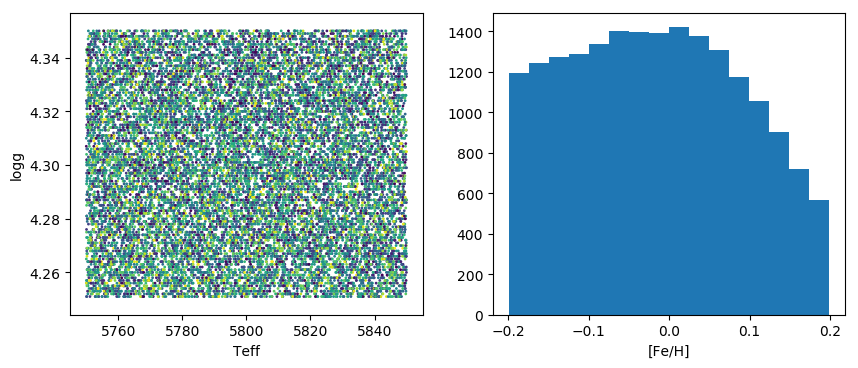

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].scatter(slamost['teff'], slamost['logg'], c=slamost['feh'], s=1);
ax[0].set_xlabel('Teff')
ax[0].set_ylabel('logg')
ax[1].hist(slamost['feh'], 16);
ax[1].set_xlabel('[Fe/H]');

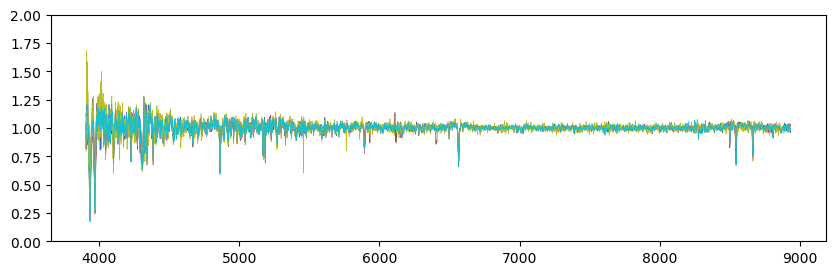

In [7]:
plt.figure(figsize=(10,3))
plt.plot(gs.wave, d.spec[:10].T, lw=.5,);
plt.ylim(0,2);

In [7]:
from TheCannon import model, dataset

In [75]:
isub = np.random.randint(low=0, high=d.spec.shape[0], size=1000)

In [76]:
tr_labels = np.vstack([slamost[isub]['teff'], slamost[isub]['logg'], slamost[isub]['feh']]).T

In [77]:
ivar = d.ivar[isub]
ivar[d.mask[isub]] = 0.

flux = d.spec[isub]
flux[d.mask[isub]] = 1.

In [78]:
ds = dataset.Dataset(
    gs.wave, d.idx[isub], flux, ivar, tr_labels,
    d.idx[isub], flux, ivar)

Loading dataset
This may take a while...


/Users/semyeong/anaconda2/envs/research/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/semyeong/anaconda2/envs/research/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [79]:
ds.set_label_names(['teff','logg','feh'])

In [80]:
%%time
m = model.CannonModel(2, useErrors=False)
m.fit(ds)

Done training model. 
CPU times: user 14.4 s, sys: 1.06 s, total: 15.4 s
Wall time: 15.5 s


Diagnostic plot: leading coeffs and scatters across wavelength.


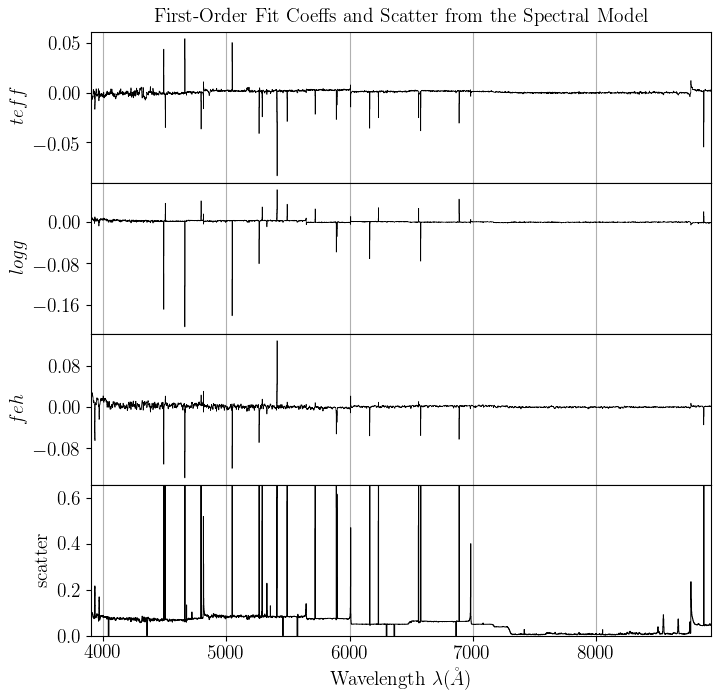

In [81]:
m.diagnostics_leading_coeffs(ds);

In [82]:
starting_guess = np.mean(ds.tr_label,axis=0)-m.pivots
errs, chisq = m.infer_labels(ds, starting_guess)

Inferring Labels


In [83]:
ds.diagnostics_1to1()

Diagnostic for label output vs. input
Saved fig 1to1_label_0.png
Diagnostic for label output vs. input
Saved fig 1to1_label_1.png
Diagnostic for label output vs. input
Saved fig 1to1_label_2.png


In [22]:
m.coeffs.shape

(3594, 10)

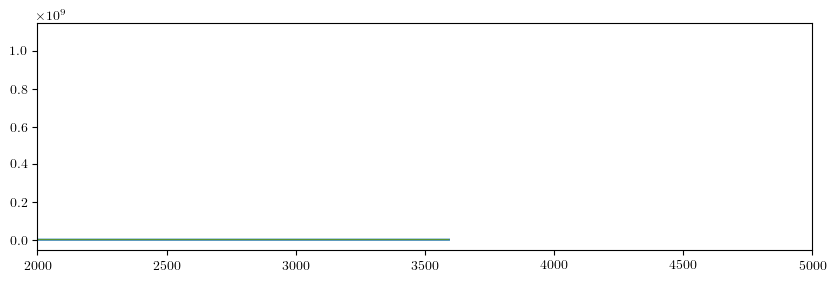

In [74]:
plt.figure(figsize=(10,3))
plt.plot(m.coeffs[:,0]);
plt.plot(np.nanmedian(d.spec[:], axis=0), lw=.5);
plt.plot(m.coeffs[:,0]-np.nanmedian(d.spec[:], axis=0), lw=.5)
# plt.plot(np.abs(np.nanmedian(d.spec, axis=0)-m.coeffs[:,0])/m.coeffs[:,0], lw=.5);
# plt.ylim(0,0.1);
plt.xlim(2000,5000);

In [43]:
m.infer_spectra(ds)

In [68]:
plt.rc('figure', dpi=120)

In [53]:
slamost[64]['logg']

4.316

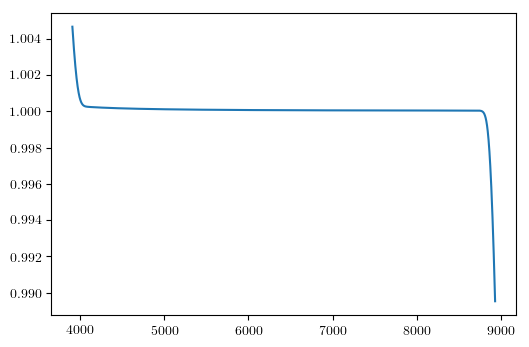

In [48]:
plt.plot(d.wave, d.spec[64]);

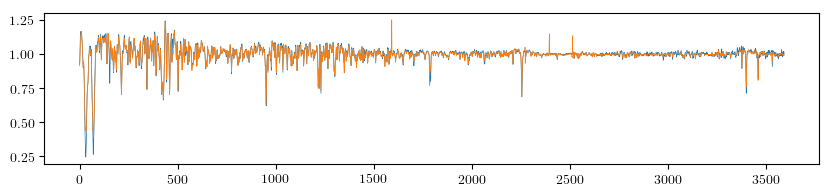

In [61]:
for i in np.rand
plt.figure(figsize=(10,2))
plt.plot(d.spec[i], lw=.5);
plt.plot(m.model_spectra[i], lw=.5);

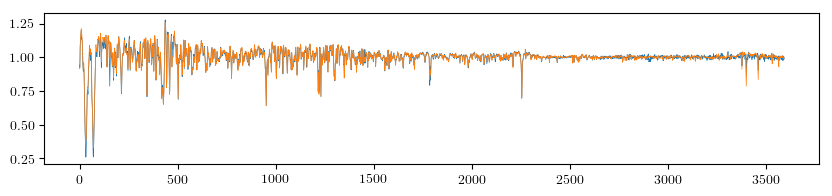

In [54]:
i = 63
plt.figure(figsize=(10,2))
plt.plot(d.spec[i], lw=.5);
plt.plot(m.model_spectra[i], lw=.5);

In [73]:
residual = d.spec[:N] - m.model_spectra

(-0.2, 0.2)

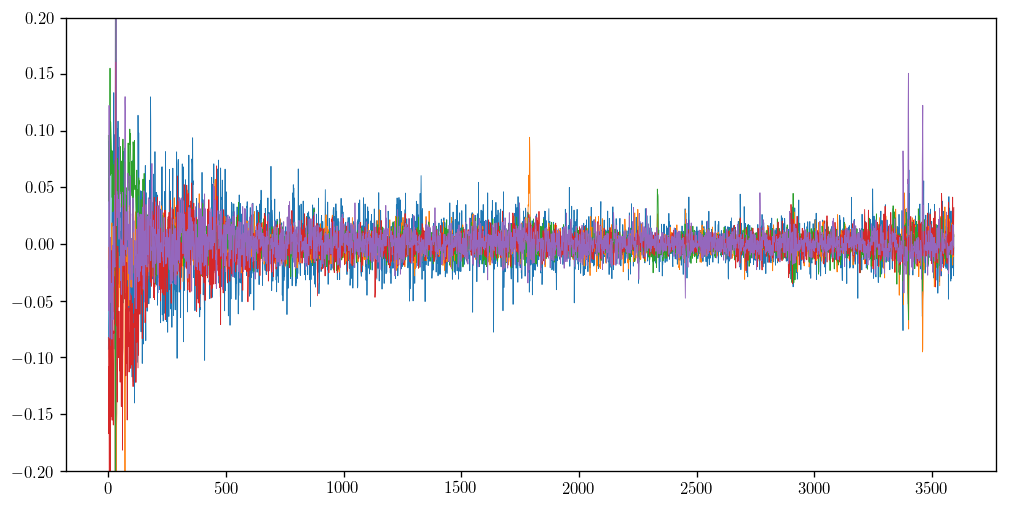

In [81]:
i = 32
plt.figure(figsize=(10,5))
plt.plot(residual[:5].T, lw=.5);
plt.ylim(-.2,.2)

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(m.coeffs[:,1]/m.coeffs[:,0], lw=.5);
plt.ylim(-0.025,.025);

In [38]:
np.where(lamost['designation'] == b'J00061720+1057419')[0]

array([], dtype=int64)

In [47]:
li15 = coords.SkyCoord("00h06m17.20s","+10d57m41.8s",)

In [46]:
co_lamost = coords.SkyCoord(lamost['ra']*u.deg, lamost['dec']*u.deg)

In [48]:
li15.match_to_catalog_sky(co_lamost)

(array(426359), <Angle [ 0.05463498] deg>, <Quantity 0.000953560204448451>)

In [49]:
idxli15 = 426359

In [52]:
lamost[idxli15]

(66607187, b'J000606.41+105545.7', b'2012-10-13', 56214, 56213, b'EG000024N121601B01', 7, 187,  1.526732,  10.929383,  17.43000031,  81.56999969,  138.13999939,  171.74000549,  128.44999695, b'Star', b'STAR', b'G3', -0.00012369,   6.67130007e-06, b'gribvjh',  13.46000004,  12.93000031,  12.78999996,  13.85999966,  13.14999962,  11.73999977,  11.47000027, b'LiuChao', b'Obj', b'-', b'116065976', 0,  0.,  1.526732,  10.929383,  5660.5,  19.29000092,  4.03200006,  0.026, -0.308,  0.018, -37.08000183,  2.)

In [53]:
lookup[idxli15]

'spec-56214-EG000024N121601B01_sp07-187.fits.gz'

In [82]:
import fitsio

In [84]:
dli15 = fitsio.read("/Volumes/Samsung_T5/destroyer/lamost_spectra_Ho_normalized/Ho_normalized_spec-56214-EG000024N121601B01_sp07-187.fits.gz")

(-0.25, 0.25)

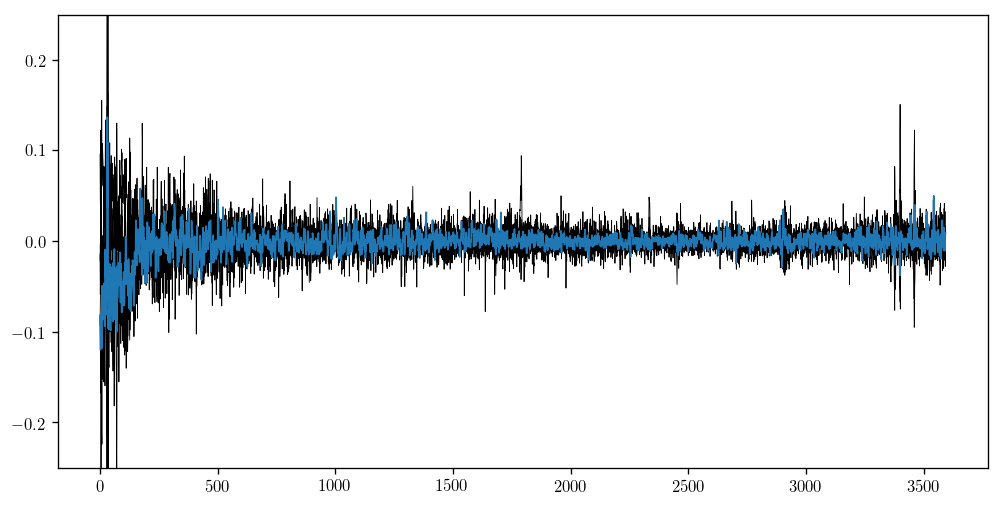

In [104]:
plt.figure(figsize=(10,5))
plt.plot(residual[:5].T, lw=.5, c='k');
plt.plot(dli15[0] - m.coeffs[:,0], lw=1);
plt.ylim(-0.25, 0.25)

In [8]:
plt.figure(figsize=(10,5))
plt.plot(gs.wave, m.coeffs[:,0], lw=.5)
plt.errorbar(x=gs.wave, y=dli15[0], yerr=1./np.sqrt(dli15[1]), lw=.5)
# plt.xlim(4000,5000);

NameError: name 'm' is not defined

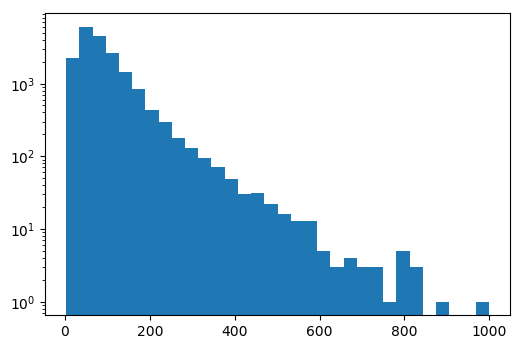

In [10]:
plt.hist(slamost['snrr'], 32, log=True);

In [172]:
ii = np.where(slamost['snrr']>100)[0]

In [166]:
ii.size

11

In [168]:
ii = ii[np.argsort(slamost[ii]['feh'])]

/Users/semyeong/anaconda2/envs/research/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


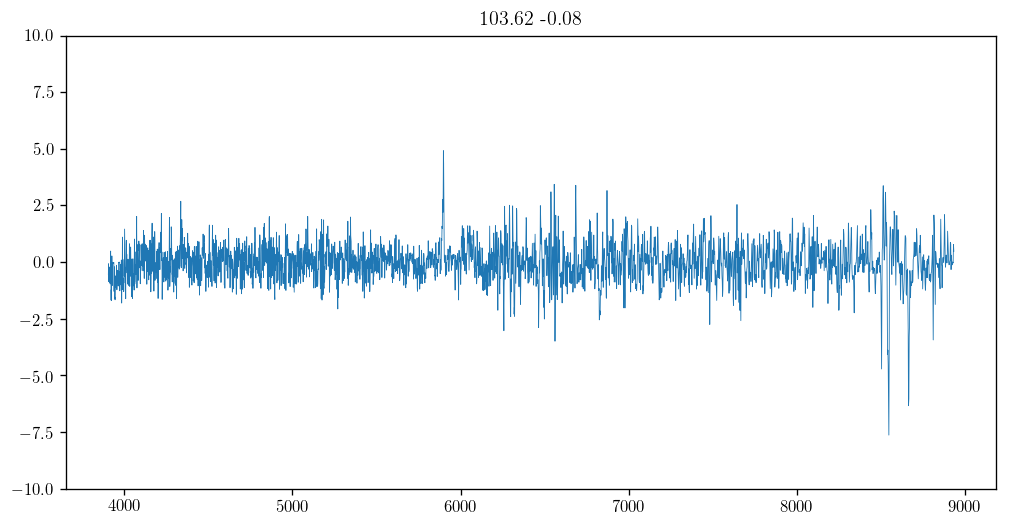

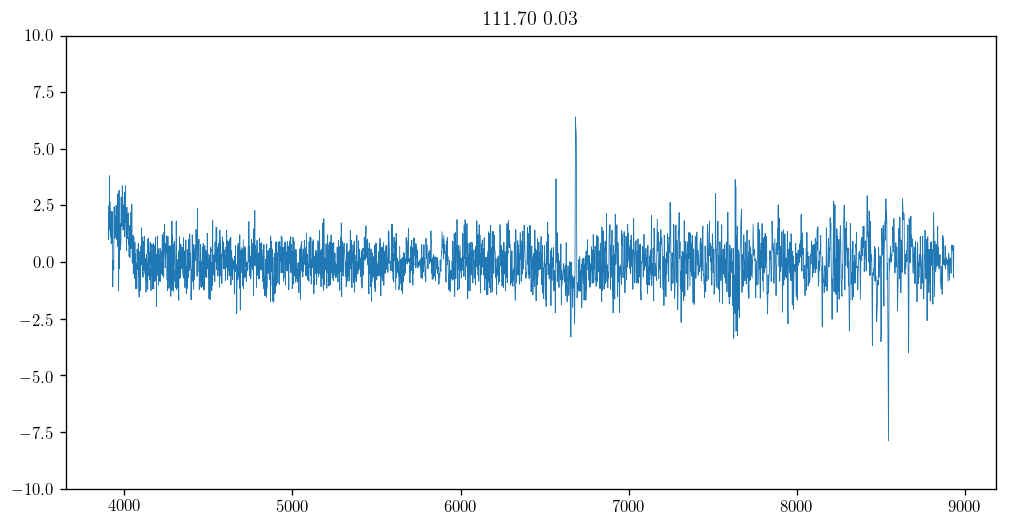

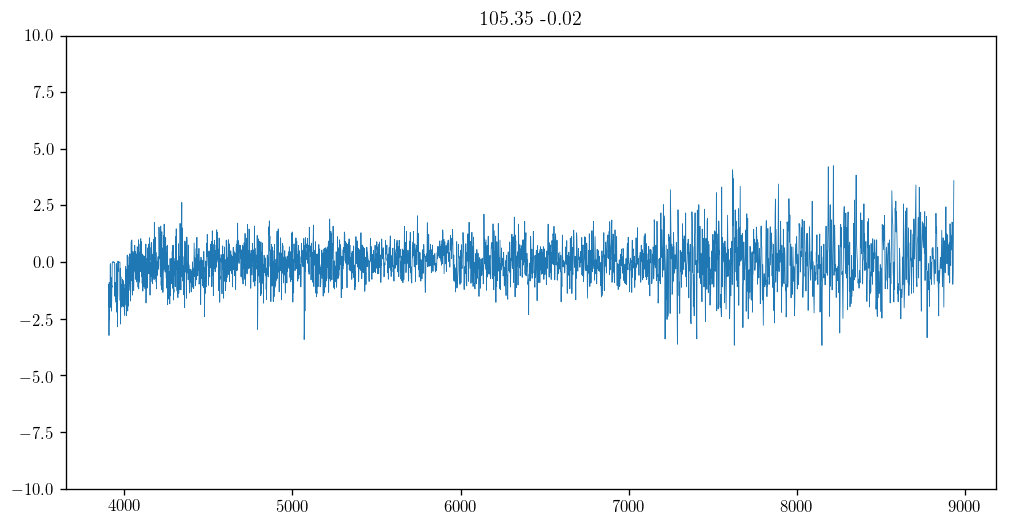

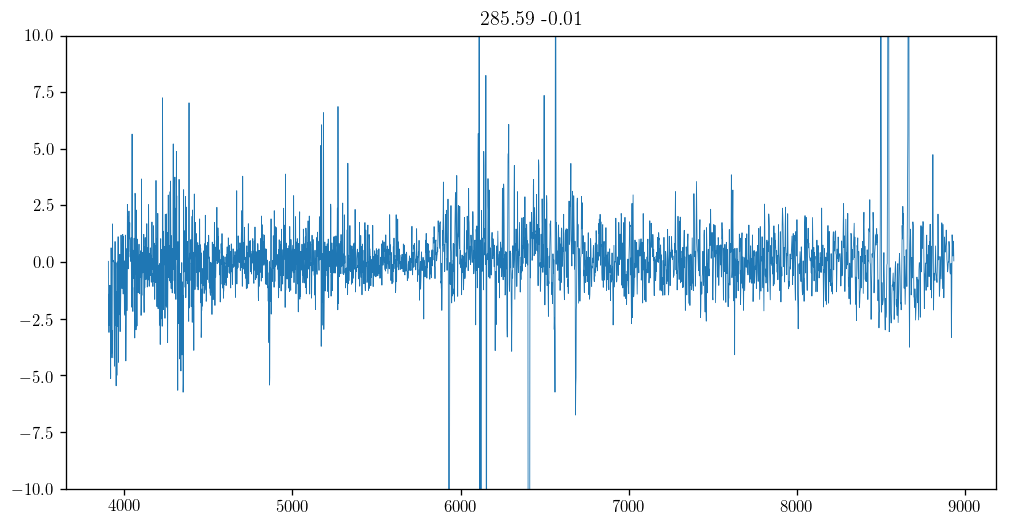

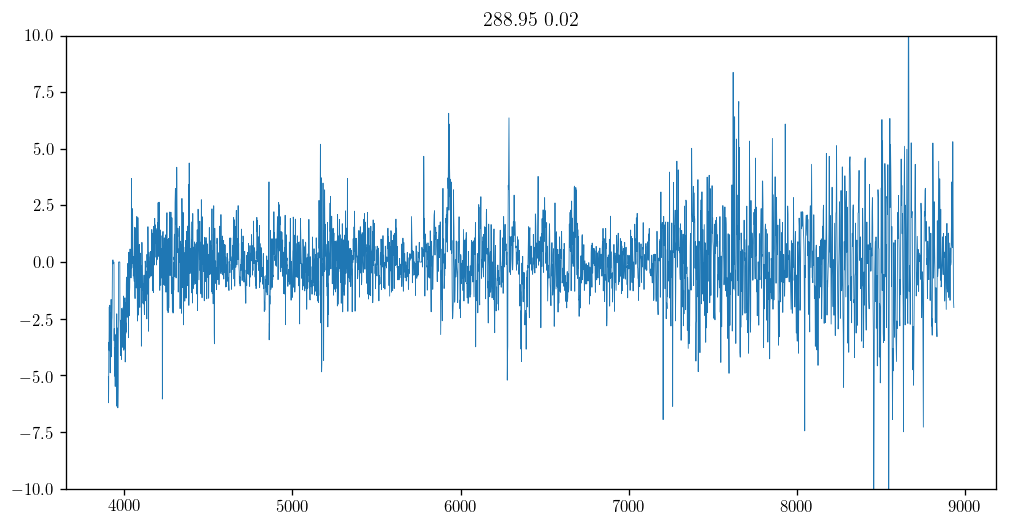

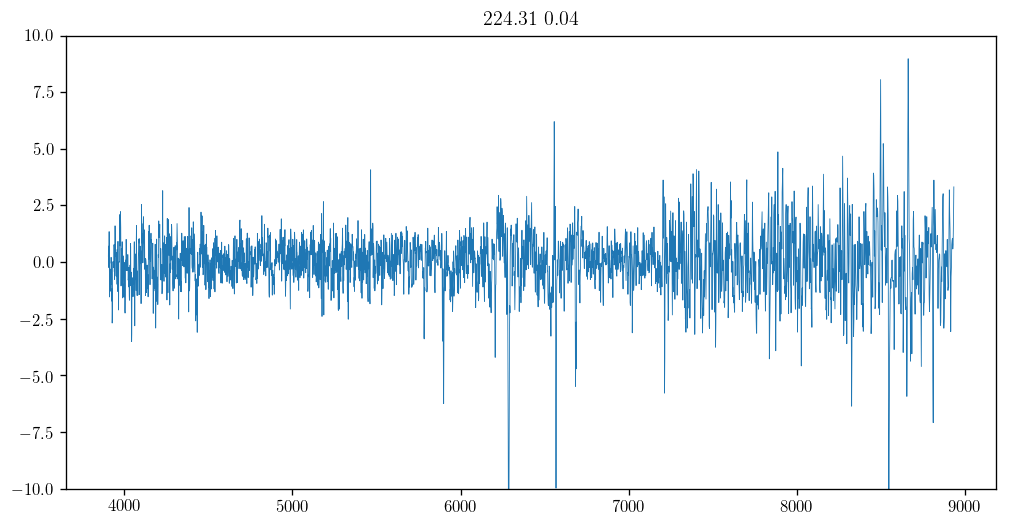

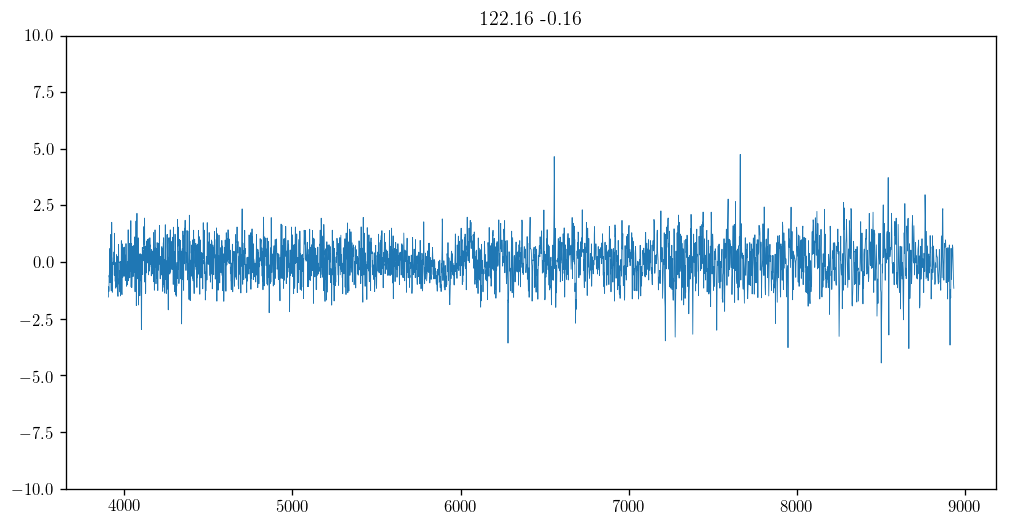

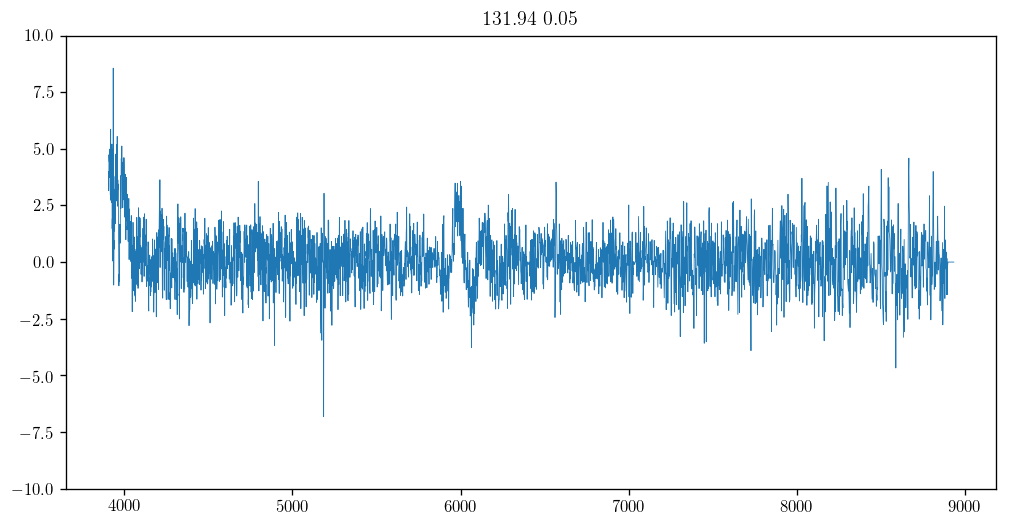

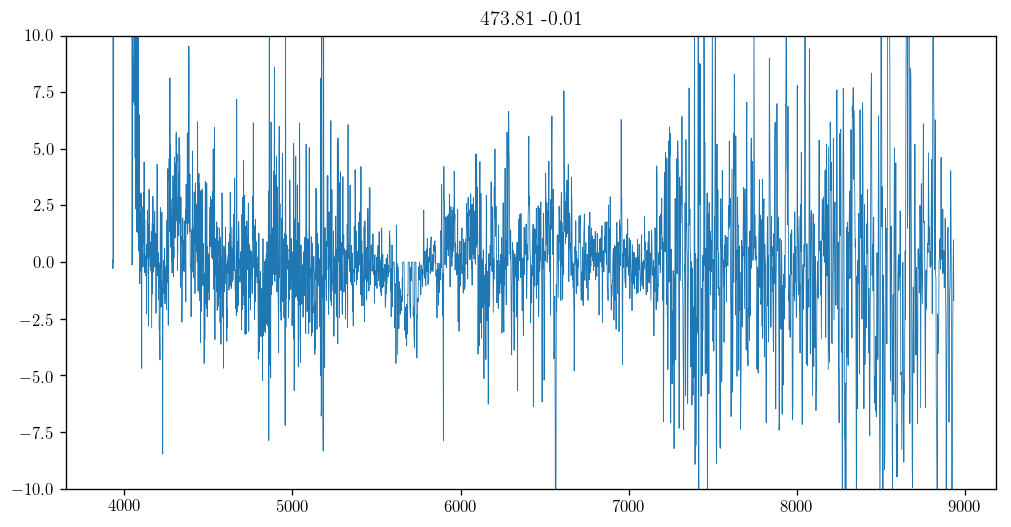

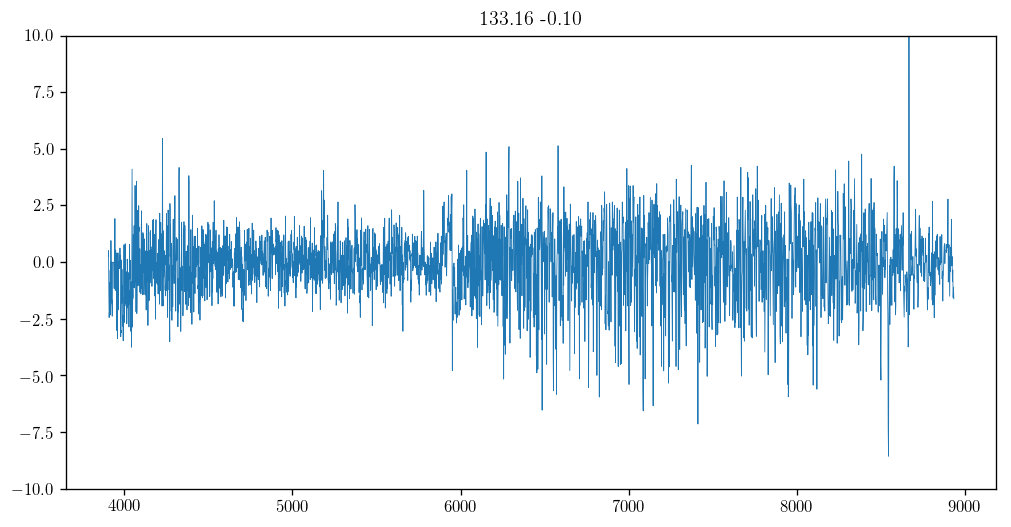

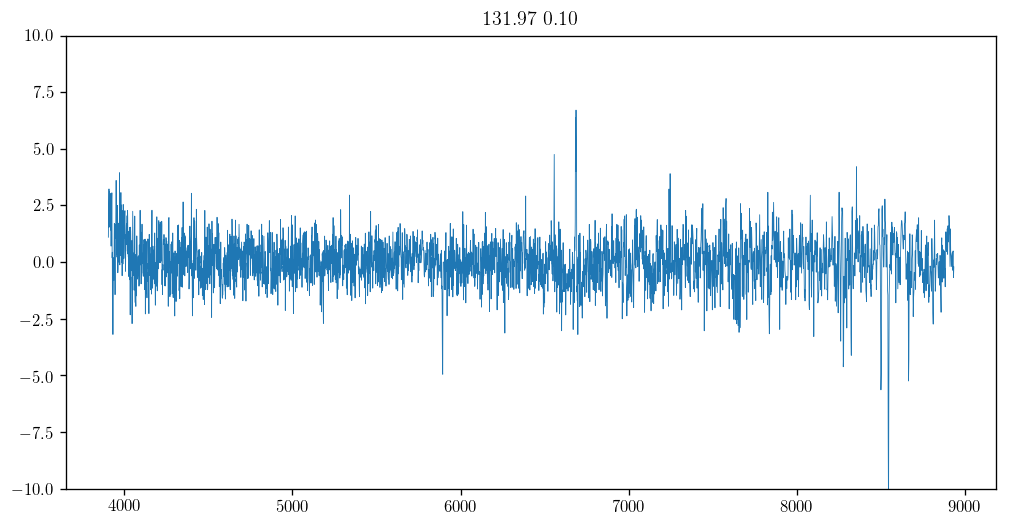

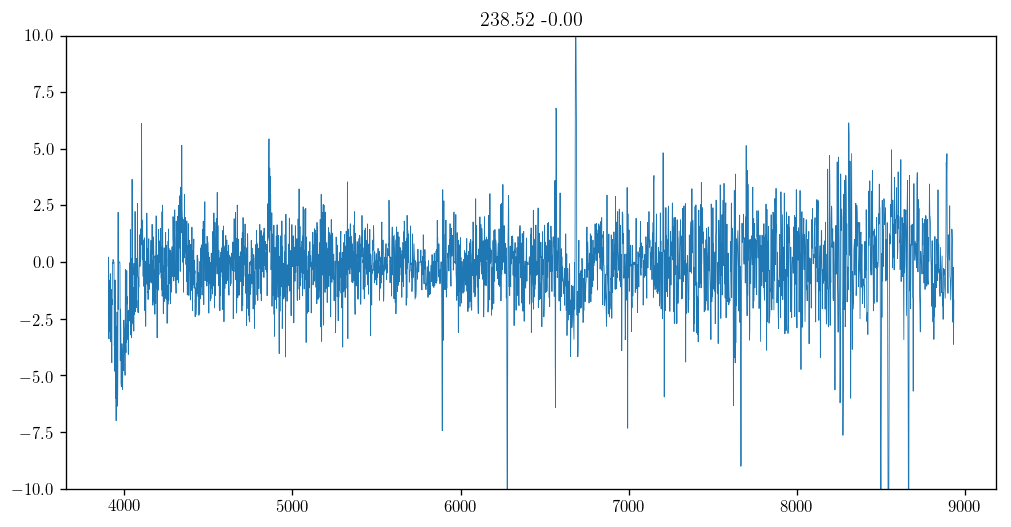

In [ ]:
for i in ii:
    plt.figure(figsize=(10,5))

    plt.plot(gs.wave, (d.spec[i] - m.model_spectra[i]) * np.sqrt(d.ivar[i]), lw=.5);
    plt.title("{:.2f} {:.2f}".format(slamost[i]['snrr'], slamost[i]['feh']));
    plt.ylim(-10,10);